In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
#アナコンダプロンプトへpip install mglearnを入力して取得。

%matplotlib inline

X.shape: (26, 2)


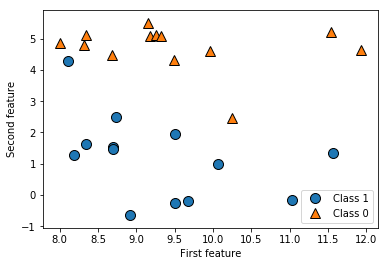

In [6]:
#p32

X,y = mglearn.datasets.make_forge()
#forge データセットの一つ
#mglearn ライブラリの一つ

mglearn.discrete_scatter(X[:,0],X[:,1],y)
#discrete.scatter データセットを散布図として△と〇でプロット化

plt.legend({"Class 0","Class 1"},loc=4)
#plt.legend グラフへ凡例を付ける
#loc=4　　plt.legendの引数の指定、凡例の場所を指定？

plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
#.format printで表示するものを（）内で設定

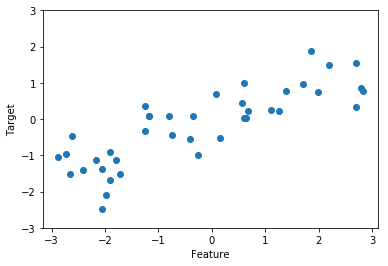

In [7]:
#p33

X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
#プロットの点を・で表す　ex'_'なら-にできる

plt.ylim(-3,3)
#値域の設定

plt.xlabel("Feature")
plt.ylabel("Target")

In [8]:
#p34

from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()


print("cancer.keys(): \n{}".format(cancer.keys()))
#\n 改行
#｛｝ 空のディクショナリを作る。　※()はタプル、{}はディクショナリ、[]はリスト
#keys 辞書オブジェクト.keys()という形で辞書オブジェクトに含まれるキーをすべて取得


print("Shape of cancer data: {}".format(cancer.data.shape))
#cancer 辞書型オブジェクト（キー1：値1,キー2:値2,...）という形を取る。
#cancer.data .dataで、値を行列として数値化。valuesでも取得できるはずだが、なぜか後ろに辞書型オブジェクトがつく
#cancer.data.shape　.shapeで、行列の数を表示

print("Sample counts per class:\n{}".format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
#for 変数　in オブジェクト　シーケンス型のオブジェクトから要素を順に変数に代入し、要素の数だけ繰り返しを行う。
#zip　二つのシーケンスを同時に処理できる。zip(A,B)でA,Bの各要素をタプル型にまとめて、[(A1,B1),(A2,B2),...]と表すことができる。
#bincount binで整数を二進数に直す。二進数の形でカウントしてる?

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}


k-最近傍法
最近傍のk個の観測データのクラスで投票して、クラスを決定する

X.shape: (26, 2)


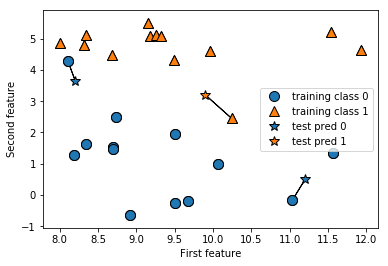

In [9]:
#p36 mglearnを使用したk-最近傍法

#forgeデータを使うのでもう一度セット
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend({"Class 0","Class 1"},loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

mglearn.plots.plot_knn_classification(n_neighbors=1)
#n_neighbors 投票に使う近傍の観測データの個数を指定する

In [10]:
#p38　scikit-learnを使ったk-最近傍法と正答率の出力

from sklearn.model_selection import train_test_split
#trainデータとtestデータに分割

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#random_state 乱数を制御するパラメータ

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
#訓練データを使った学習

print("Test set predictions: {}".format(clf.predict(X_test)))
#testセットに対する予測

print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test))) 
#y_testに対する予測の正答率
#:.2f 小数点以下2桁をfloat型で表示

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


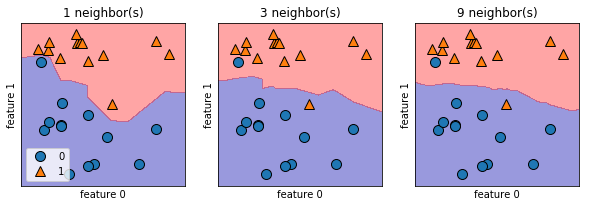

In [11]:
#p39 「for 変数　in オブジェクト」と組み合わせて、scikitlearnでkNNを3パターン出力する方法

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,3, figsize=(10, 3))
#plt.subplot 図を行列形式で別々に描きたいときに使用。
#plt.subplot（行数,列数,何番目のプロット）という形で指定。今回は、横1縦3に別れた図の書き方を指定した。指
#fig 図をかける領域
#axes fig内でプロットを描画する領域の指定
#figsize 図の大きさ指定。

for n_neighbors, ax in zip([1,3,9], axes):
#[1,3,9]とaxes(座標軸)の組み合わせを3セット作る

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True,eps=0.5,ax=ax,alpha=.4)
    # 2d_separator クラス分けをする境界の作成
    #fill Trueで指定するとクラス領域の色を、赤と青で塗る
    #eps　枠組みの黒線と図の間の余白を指定できる
    #alpha 領域の色の濃さを変更できる
    #ax = ax forの中で用いることで、描画領域を順番に指定
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
#axesの0番に凡例を割り振る

k=1の時により訓練データに近くなるのが分かる
k=9は決定境界がなめらか

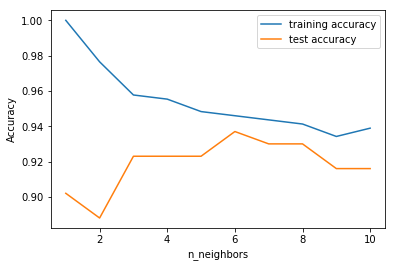

In [12]:
#p40 scikit-learnを使ったk-最近傍法におけるkの値の最適精度を調べる

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

neighbors_settings = range(1, 11)
#kの値を1～11で調査

training_accuracy = []
#訓練データセットにおける、kの値に対する最適精度の値を代入する箱を作る
test_accuracy = []
#テストデータセットにおける、kの値に対する最適精度の値を代入する箱を作る

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    #訓練データセットに対して、作った箱へk=1,2,...,11での最適制度の値を順番に代入する
    #リスト.append(値) リストで作った箱の末尾へ()内の値を代入
    test_accuracy.append(clf.score(X_test, y_test))
    #テストデータセットに対して、作った箱へk=1,2,...,11での最適制度の値を順番に代入する

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

k=6で最適となるのが分かる

k近傍回帰

k近傍回帰 ・・・テストデータの最近傍である訓練データとその距離による重みによって決定
k-最近傍法・・・テストデータの最近傍である訓練データの投票によってクラスを決定

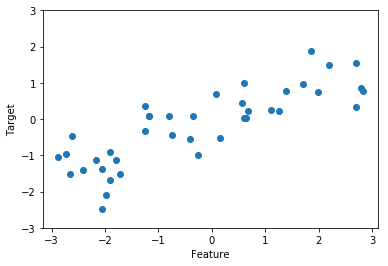

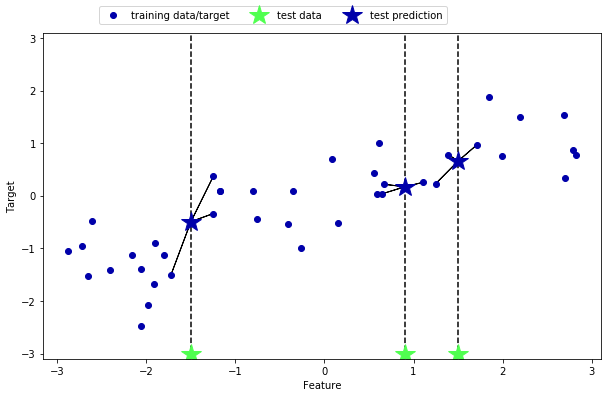

In [14]:
#p40 waveデータによるk近傍回帰

X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
#p43 k近傍回帰における決定係数の求め方

from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test set predictions: {}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test))) 

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


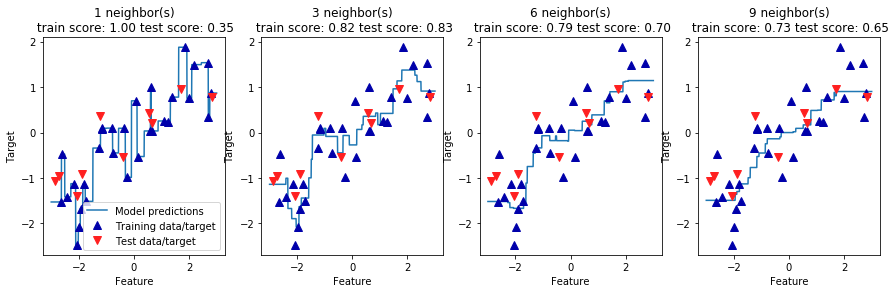

In [16]:
#p44 scikit-learnを使ったk近傍回帰におけるk＝1,3,6,9のときの最適精度（決定係数）を調べる

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 4, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
#linescape 線形で配置されたベクトルの作成。linescape(A,B,C)の形式で書く。始点Aから終点BまでにC個の等間隔に配置された線形ベクトルを作る。
#logscapeだと対数で等間隔に配置されたベクトルを作成する。
#reshape .reshape(A,B)の形で書かれる。ある行数と列数を持つベクトルAを、別の行数と列数の形であるBに変換する？

for n_neighbors, ax in zip([1,3,6,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
    ))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
    axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
#loc="best"でPCが自動的に最適な所に凡例を作ってくれる

k近傍回帰では、k=3のとき最も決定係数が高いスコアを出す。